- напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [ ]:
def h(w_0, w_1, x):
    return w_0 + w_1 * x

- створіть функцію для обчислення функції втрат у векторному вигляді

In [ ]:
def loss(w_0, w_1, x, y):
    return (h(w_0, w_1, x) - y)**2


- реалізуйте один крок градієнтного спуску

In [ ]:
def gradient_step(X, y, theta, learning_rate):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    gradients = (2/m) * X.T.dot(errors)
    theta = theta - learning_rate * gradients
    return theta

- знайдіть найкращі параметри w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

df = pd.read_csv('Housing.csv')

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
class MyLinearRegression:

    def __init__(self, learning_rate=0.01, n_iters=500):

        self.lr = learning_rate
        self.n_iters = n_iters

        self.weights = None
        self.bias = None
        self.costs = []

    def gradient_descent(self, X, y):
        n_samples = X.shape[0]

        for _ in range(self.n_iters):

            # predicted value with the current weights (default is zeros)
            y_predicted = np.dot(X, self.weights) + self.bias

            difference = y_predicted - y

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, difference)
            db = (1 / n_samples) * np.sum(difference)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # cost value of the current iteration
            cost = (1/n_samples) * np.sum(difference**2)
            self.costs.append(cost)

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # reshaping target variable (m,1) to (m,)
        y = y.reshape(y.shape[0])

        print(f"X     --> shape: {X.shape}")
        print(f"y     --> shape: {y.shape}")
        print(f"THETA --> shape: {self.weights.shape}")

        self.gradient_descent(X, y)


    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [51]:
normalized_df = df.copy(deep=True)
normalized_df.area = (df.area - df.area.mean()) / df.area.std()
normalized_df.price = (df.price - df.price.mean()) / df.price.std()
normalized_df.bedrooms = (df.bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
normalized_df.bathrooms = (df.bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

X     --> shape: (545, 3)
y     --> shape: (545,)
THETA --> shape: (3,)


<Axes: >

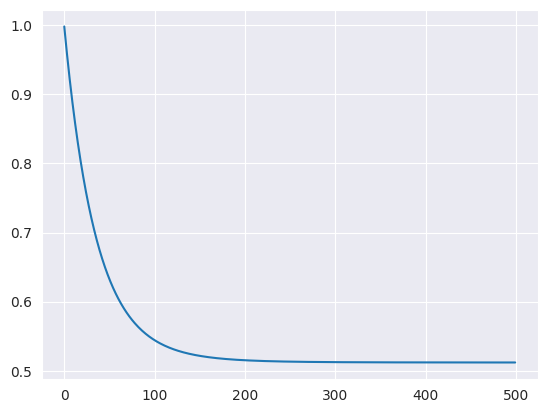

In [52]:
X_train = np.array(normalized_df[['area', 'bedrooms', 'bathrooms']])
y_train = np.array(normalized_df['price'])

linear_regression_model = MyLinearRegression(learning_rate=0.01, n_iters=500)
linear_regression_model.fit(X_train, y_train)

sns.lineplot(x=range(linear_regression_model.n_iters), y=linear_regression_model.costs)

- Test

In [53]:
normalized_df = df.copy(deep=True)

area, bedrooms, bathrooms = 74, 4, 2

test_area = (area - df.area.mean()) / df.area.std()
test_bedrooms = (bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
test_bathrooms = (bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

normalized_prediction = linear_regression_model.predict(np.array([[test_area, test_bedrooms, test_bathrooms]]))

In [47]:
predicted_price = normalized_prediction[0] * df.price.std() + df.price.mean()
normalized_prediction, predicted_price

(array([-0.27399616]), 4254235.966791389)

- знайдіть ці ж параметри за допомогою аналітичного рішення;

In [54]:
class MyLinearRegressionNormalEquation:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        # Добавление столбца единиц для учета смещения (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Вычисление весов с использованием нормального уравнения
        self.weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

    def predict(self, X):
        # Добавление столбца единиц для учета смещения (bias)
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return X_b.dot(self.weights)

In [55]:
linear_regression_model = MyLinearRegressionNormalEquation()
linear_regression_model.fit(X_train, y_train)


In [56]:
area, bedrooms, bathrooms = 74, 4, 2
test_area = (area - df.area.mean()) / df.area.std()
test_bedrooms = (bedrooms - df.bedrooms.mean()) / df.bedrooms.std()
test_bathrooms = (bathrooms - df.bathrooms.mean()) / df.bathrooms.std()

normalized_prediction = linear_regression_model.predict(np.array([[test_area, test_bedrooms, test_bathrooms]]))

In [57]:
predicted_price = normalized_prediction[0] * df.price.std() + df.price.mean()
normalized_prediction, predicted_price

(array([-0.27399616]), 4254235.966791389)

- порівняйте отримані результати.

MyLinearRegression -> result: 4254235.966791389

MyLinearRegressionNormalEquation -> result 4254235.966791389

MyLinearRegression = MyLinearRegressionNormalEquation
